In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [ ]:
red_wine_dataset=pd.read_csv('winequality-red.csv',sep=";")
white_wine_dataset=pd.read_csv("winequality-white.csv",sep=";")

In [4]:
red_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red_wine_dataset['wine_type']=0
white_wine_dataset['wine_type']=1
Consolidated_wine_df = pd.concat([red_wine_dataset, white_wine_dataset], axis=0, ignore_index=True)
Consolidated_wine_df.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [7]:
Consolidated_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [8]:
#1.2 MCAR missing- Random chance of data misses
MCAR_missing=Consolidated_wine_df.copy()
np.random.seed(42)
mcar_indices = MCAR_missing.sample(frac=0.05).index
MCAR_missing.loc[mcar_indices, 'citric acid'] = np.nan


In [9]:
MCAR_missing.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             325
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
wine_type                 0
dtype: int64

In [10]:
MCAR_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6172 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [11]:
#MAR missing-Depends on other info
mar_missing=Consolidated_wine_df.copy()
mar_condition = mar_missing[mar_missing['quality'] < 5]
mar_indices = mar_condition.sample(frac=0.03, random_state=42).index
mar_missing.loc[mar_indices, 'sulphates'] = np.nan


In [12]:
print("Missing values:\n", mar_missing['sulphates'].isnull().sum())


Missing values:
 7


In [13]:
#Mean Imputation
mean_imputed = mar_missing.copy()
mean_imputed.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               7
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [14]:
def feature_engineering(df):
    df['acid_ratio'] = df['fixed acidity'] / (df['volatile acidity'] + 1e-5)  # Avoid divide by zero
    df['sulfur_ratio'] = df['free sulfur dioxide'] / (df['total sulfur dioxide'] + 1e-5)
    df['alcohol_sugar_interaction'] = df['alcohol'] * df['residual sugar']
    return df

# Apply to the KNN-imputed dataset (recommended)
wine_FeatureEngineering = feature_engineering(Consolidated_wine_df)

# Quick check
wine_FeatureEngineering [['acid_ratio', 'sulfur_ratio', 'alcohol_sugar_interaction']].describe()

,acid_ratio,sulfur_ratio,alcohol_sugar_interaction
count,6497.000000,6497.000000,6497.000000
mean,25.337083,0.286768,55.070088
std,10.733303,0.124645,45.643541
min,4.807646,0.022727,6.360000
25%,17.691854,0.202073,19.040000
50%,23.999040,0.269767,33.020000
75%,31.051814,0.348837,82.140000
max,89.988751,0.857143,769.860000


In [15]:
X = wine_FeatureEngineering.drop('quality', axis=1)
y = wine_FeatureEngineering['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)
scaling={"StandardScaler":StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler()
}
results = {}
for name,Scaler in scaling.items():
    X_Scaledtrained=Scaler.fit_transform(X_train)
    X_Scaledtest=Scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_Scaledtrained, y_train)
    y_pred = knn.predict(X_Scaledtest)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    rmse = mean_squared_error(y_test, y_pred)** 0.5
    results[name] = {'Accuracy': acc, 'F1-score': f1, 'RMSE': rmse}
results_df = pd.DataFrame(results).T
print(results_df)


    


                Accuracy  F1-score      RMSE
StandardScaler  0.567692  0.557657  0.792270
MinMaxScaler    0.560000  0.552087  0.797593
RobustScaler    0.560000  0.551691  0.809083


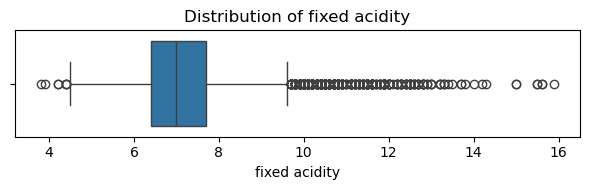

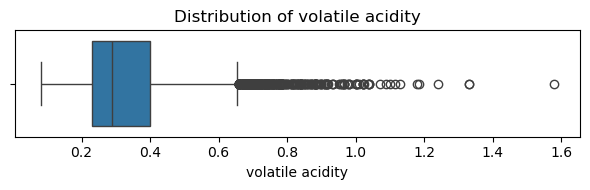

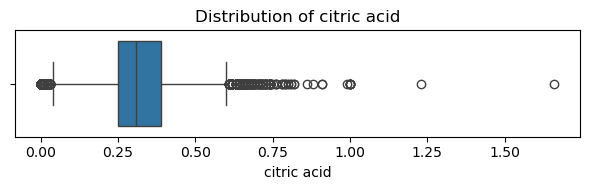

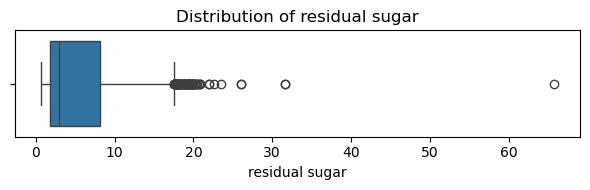

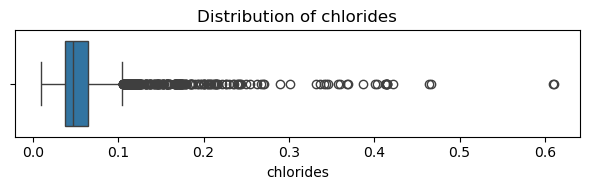

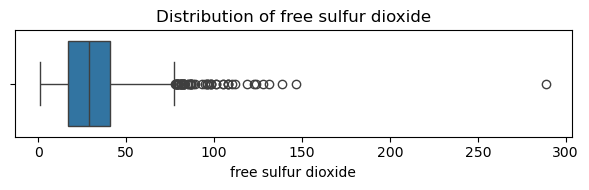

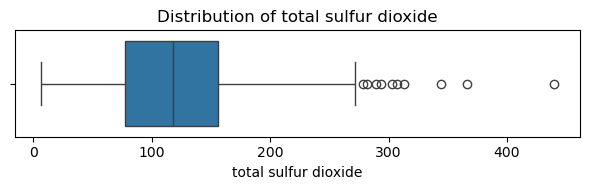

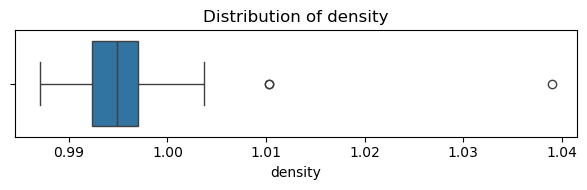

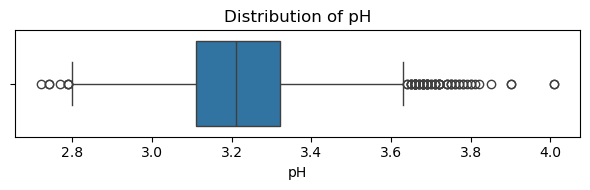

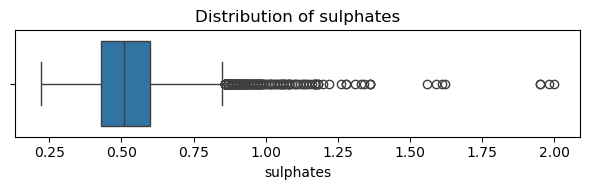

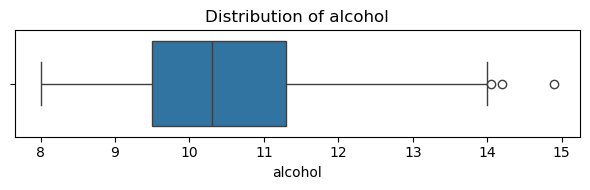

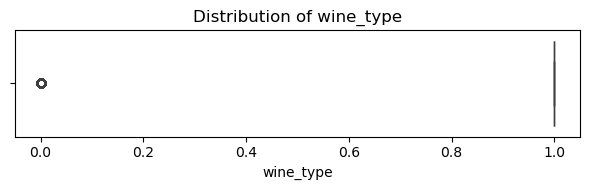

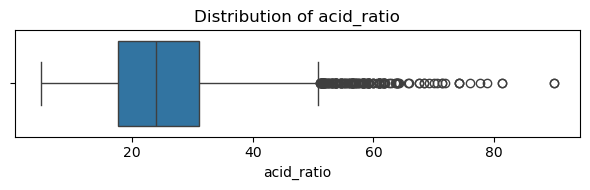

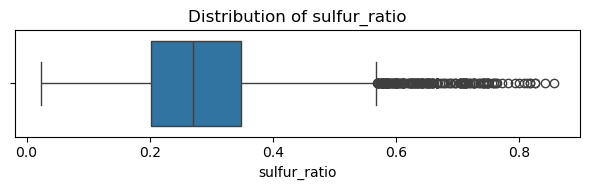

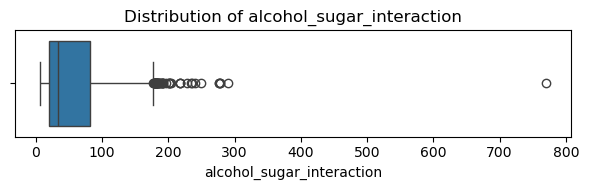

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=wine_FeatureEngineering[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

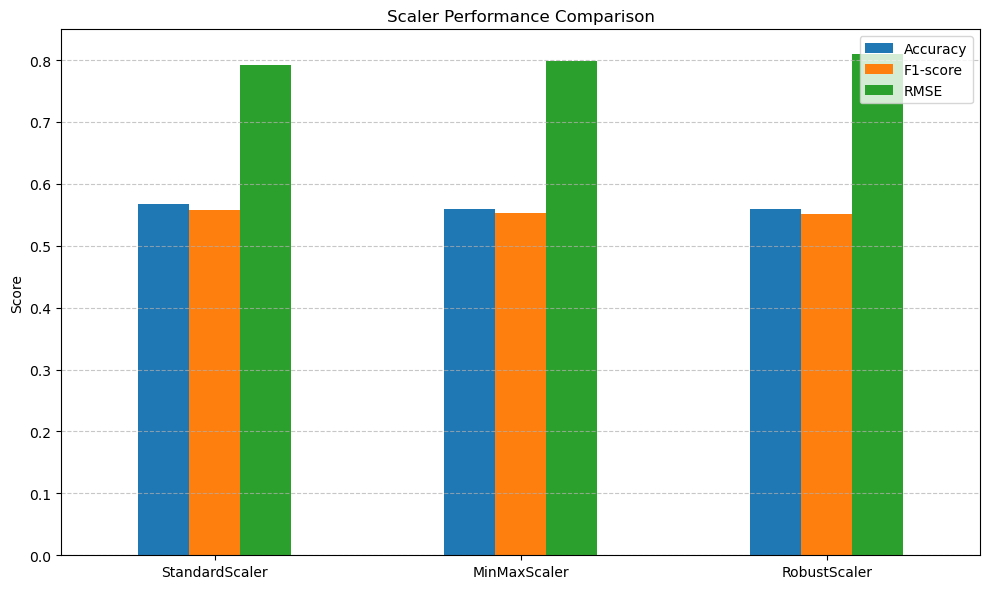

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
results_df.plot(kind='bar', ax=ax)

# Styling
plt.title('Scaler Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot
plt.savefig('scaler_performance_comparison.png')
plt.show()




In [20]:
#- KNN is distance-based: It relies on Euclidean distance, so feature scaling is critical.
#StandardScaler standardizes features to have mean = 0 and variance = 1. This ensures all features contribute equally to distance calculations.
#It handles normal distributions well, which is often the case with chemical properties in wine datasets.


wine_FeatureEngineering.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,acid_ratio,sulfur_ratio,alcohol_sugar_interaction
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,10.571278,0.323529,17.86
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,8.863536,0.373134,25.48
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,10.263023,0.277778,22.54
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,39.998571,0.283333,18.62
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,10.571278,0.323529,17.86


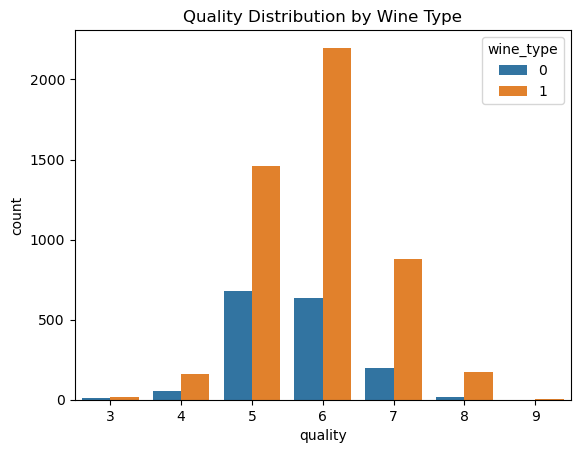

In [21]:
sns.countplot(data=wine_FeatureEngineering,x='quality',hue='wine_type')
plt.title('Quality Distribution by Wine Type')
plt.show()

In [22]:
# I think imbalance in quality 3,6,7

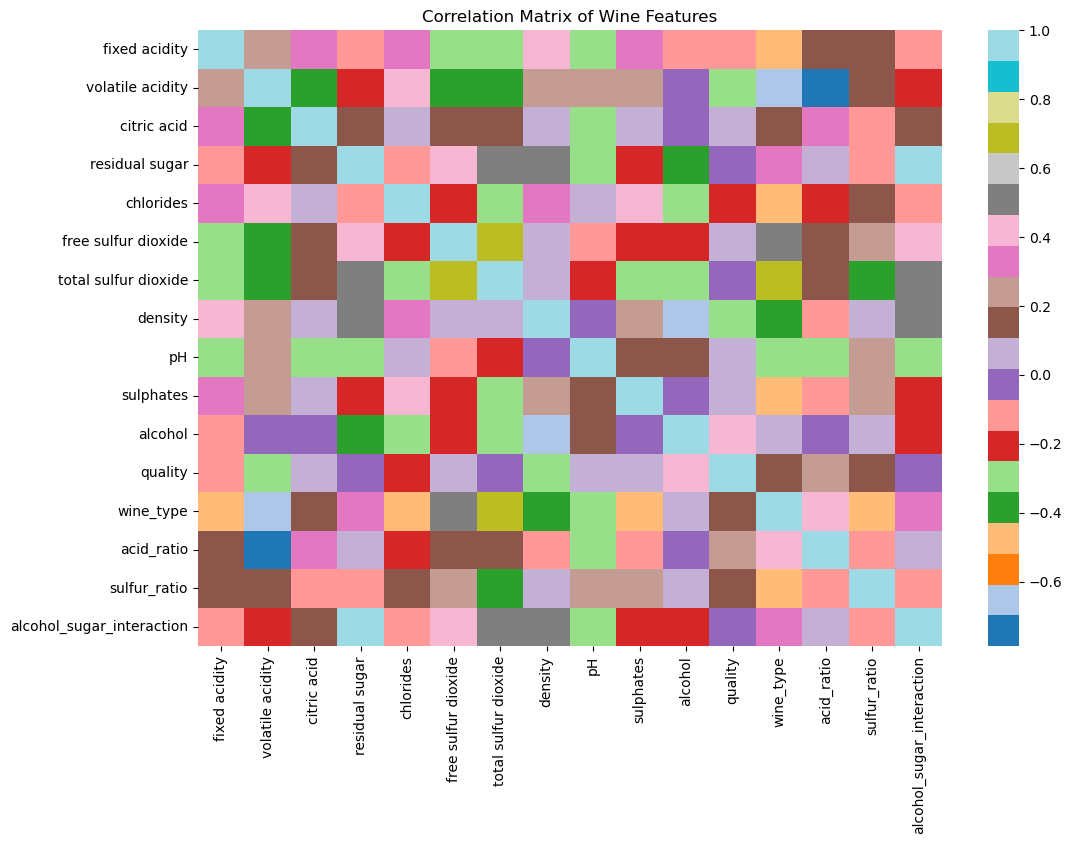

In [23]:
plt.figure(figsize=(12,8))#2.2.1
corr_matrix = wine_FeatureEngineering.dropna().corr()  # Drop NaNs for correlation
sns.heatmap(corr_matrix, annot=False, cmap='tab20')
plt.title("Correlation Matrix of Wine Features")
plt.show()


In [24]:
wine_FeatureEngineering.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,acid_ratio,sulfur_ratio,alcohol_sugar_interaction
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,10.571278,0.323529,17.86
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,8.863536,0.373134,25.48
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,10.263023,0.277778,22.54
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,39.998571,0.283333,18.62
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,10.571278,0.323529,17.86


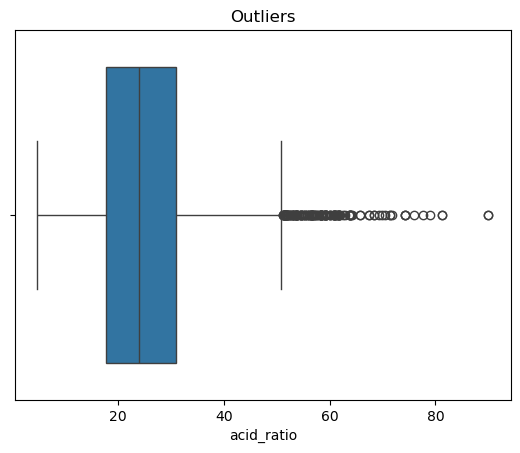

In [25]:
sns.boxplot(x=wine_FeatureEngineering['acid_ratio'])
plt.title("Outliers")
plt.show()
#clear Representation of outliers

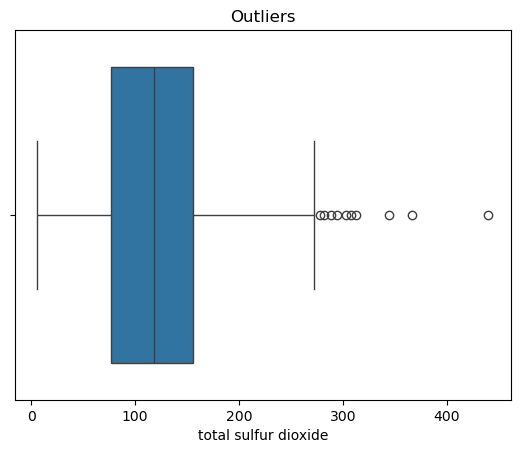

In [26]:
sns.boxplot(x=wine_FeatureEngineering['total sulfur dioxide'])
plt.title("Outliers")
plt.show()
#clear Representation of outliers

In [27]:
#Using standardization to remove outliers
scaler=StandardScaler()
wine_FeatureEngineering['acid_ratio_std'] = scaler.fit_transform(wine_FeatureEngineering[['acid_ratio']])


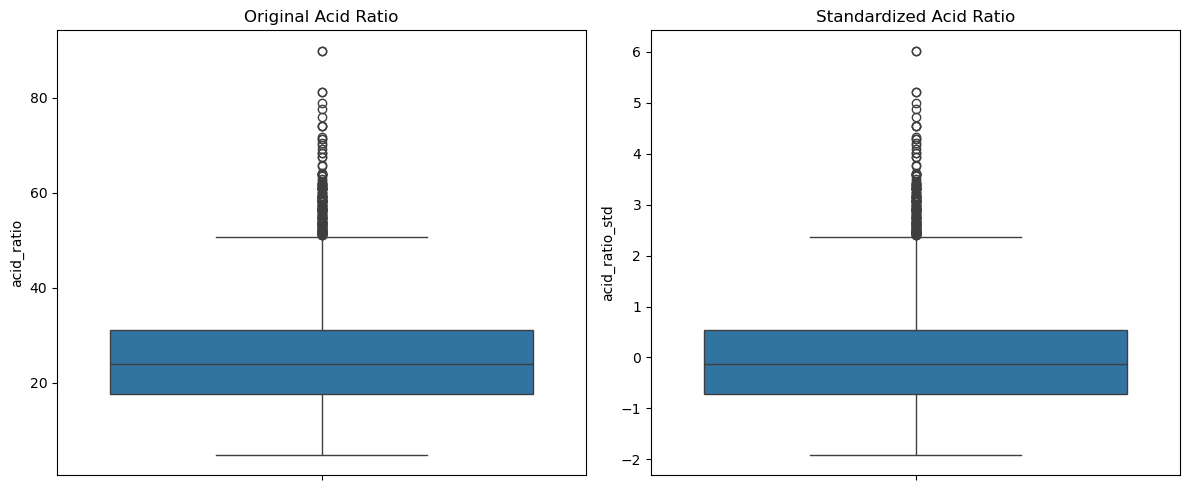

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
sns.boxplot(y=wine_FeatureEngineering['acid_ratio'], ax=axes[0])
axes[0].set_title('Original Acid Ratio')

# Standardized distribution
sns.boxplot(y=wine_FeatureEngineering['acid_ratio_std'], ax=axes[1])
axes[1].set_title('Standardized Acid Ratio')

plt.tight_layout()
plt.show()


In [29]:
wine_FeatureEngineering.corr()['quality'].sort_values(ascending=False)


quality                      1.000000
alcohol                      0.444319
acid_ratio                   0.216829
acid_ratio_std               0.216829
wine_type                    0.119323
sulfur_ratio                 0.116287
citric acid                  0.085532
free sulfur dioxide          0.055463
sulphates                    0.038485
pH                           0.019506
alcohol_sugar_interaction    0.012297
residual sugar              -0.036980
total sulfur dioxide        -0.041385
fixed acidity               -0.076743
chlorides                   -0.200666
volatile acidity            -0.265699
density                     -0.305858
Name: quality, dtype: float64

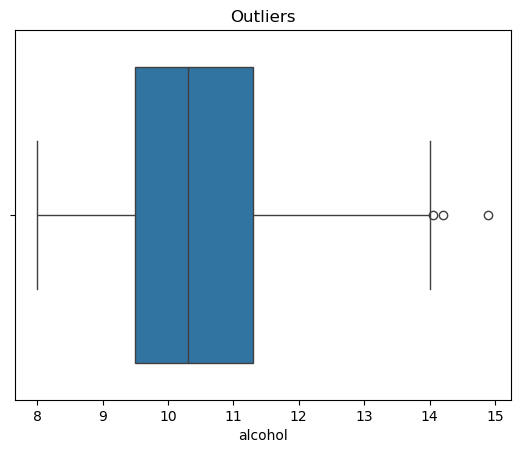

In [30]:
sns.boxplot(x=wine_FeatureEngineering['alcohol'])
plt.title("Outliers")
plt.show()

In [31]:
X_1=wine_FeatureEngineering[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_1=wine_FeatureEngineering['quality']


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Step 1: Split into 70% train and 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X_1, y_1, test_size=0.30, random_state=42)
# Step 2: Split temp into 15% validation and 15% test (i.e., 50% of temp each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy with outliers:", accuracy_score(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


print(classification_report(y_test, y_pred))


Accuracy with outliers: 0.4646153846153846
Mean Absolute Error (MAE): 0.6451282051282051
Root Mean Squared Error (RMSE): 0.9440773545012354
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.06      0.08        35
           5       0.43      0.51      0.47       301
           6       0.53      0.53      0.53       453
           7       0.39      0.33      0.35       160
           8       0.38      0.14      0.21        21
           9       0.00      0.00      0.00         1

    accuracy                           0.46       975
   macro avg       0.26      0.22      0.23       975
weighted avg       0.45      0.46      0.46       975



C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
wine_FeatureEngineering_clean = wine_FeatureEngineering[(wine_FeatureEngineering['acid_ratio'] < 40)]
X_clean1=wine_FeatureEngineering_clean[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_clean1=wine_FeatureEngineering_clean['quality']

In [34]:
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X_clean1, y_clean1, test_size=0.30, random_state=42)
# Step 2: Split temp into 15% validation and 15% test (i.e., 50% of temp each)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp1, y_temp1, test_size=0.50, random_state=42)
knn_clean = KNeighborsClassifier(n_neighbors=5)
knn_clean.fit(X_train1, y_train1)
y_pred1 = knn_clean.predict(X_test1)

print("Accuracy without outliers:", accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))
mae = mean_absolute_error(y_test1, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)



Accuracy without outliers: 0.496045197740113
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.06      0.09        31
           5       0.53      0.57      0.55       327
           6       0.50      0.61      0.55       357
           7       0.41      0.21      0.28       137
           8       0.67      0.13      0.22        30
           9       0.00      0.00      0.00         1

    accuracy                           0.50       885
   macro avg       0.32      0.23      0.24       885
weighted avg       0.49      0.50      0.48       885

Mean Absolute Error (MAE): 0.6090395480225989
Root Mean Squared Error (RMSE): 0.9199606967777587


C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
#Improvement in accuracy after removing outliers of acid ratio and also check whether it is regression or classification

In [36]:
def quality_weighted_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Count predictions within ±1 of true value
    close = np.abs(y_true - y_pred) <= 1
    score = np.sum(close) / len(y_true)
    
    return score

qwa = quality_weighted_accuracy(y_test1, y_pred1)
print("Quality-Weighted Accuracy:", qwa)


Quality-Weighted Accuracy: 0.9073446327683616


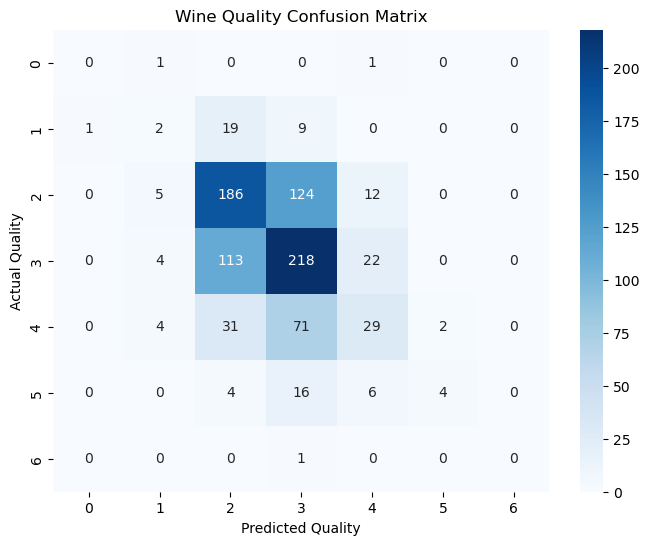

In [37]:
cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.title("Wine Quality Confusion Matrix")
plt.show()


In [38]:
wine_FeatureEngineering_clean = wine_FeatureEngineering[(wine_FeatureEngineering['acid_ratio'] < 40)]
X_clean1=wine_FeatureEngineering_clean[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_clean1=wine_FeatureEngineering_clean['quality']
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X_clean1, y_clean1, test_size=0.30, random_state=42)
# Step 2: Split temp into 15% validation and 15% test (i.e., 50% of temp each)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp1, y_temp1, test_size=0.50, random_state=42)

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

max_accuracy = 0
best_k = 0
accuracies = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train1, y_train1, cv=skf, scoring='accuracy')
    mean_score = np.mean(scores)
    accuracies.append(mean_score)
    
    if mean_score > max_accuracy:
        max_accuracy = mean_score
        best_k = k

print("Best k:", best_k)
print("Max CV Accuracy:", max_accuracy)


C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dsnat\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dsnat\anaconda3\Lib\s

Best k: 1
Max CV Accuracy: 0.5353845476557341


In [40]:
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train1, y_train1)
y_pred_euclidean = knn_euclidean.predict(X_test1)
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train1, y_train1)
y_pred_manhattan = knn_manhattan.predict(X_test1)
from sklearn.ensemble import RandomForestClassifier
knn_minkowski = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)
knn_minkowski.fit(X_train1, y_train1)
y_pred_minkowski = knn_minkowski.predict(X_test1)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train1, y_train1)
feature_importances = rf.feature_importances_



In [41]:
X_train_weighted = X_train1 * feature_importances
X_test_weighted = X_test1 * feature_importances

knn_weighted = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_weighted.fit(X_train_weighted, y_train1)
y_pred_weighted = knn_weighted.predict(X_test_weighted)


In [42]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model("Euclidean", y_test1, y_pred_euclidean)
evaluate_model("Manhattan", y_test1, y_pred_manhattan)
evaluate_model("Minkowski (p=3)", y_test1, y_pred_minkowski)
evaluate_model("Weighted Euclidean", y_test1, y_pred_weighted)



🔍 Euclidean
Accuracy: 0.496045197740113
MAE: 0.6090395480225989
RMSE: 0.9199606967777587

🔍 Manhattan
Accuracy: 0.503954802259887
MAE: 0.5943502824858757
RMSE: 0.903227108228904

🔍 Minkowski (p=3)
Accuracy: 0.47909604519774013
MAE: 0.6293785310734463
RMSE: 0.9333736875860419

🔍 Weighted Euclidean
Accuracy: 0.4994350282485876
MAE: 0.5898305084745763
RMSE: 0.8855398302507076
